In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [5]:
import numpy as np

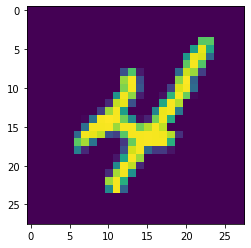

In [6]:
import matplotlib.pyplot as plt
image = np.asarray(x_train[9]).squeeze()
plt.imshow(image)
plt.show()

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy') > .998):
            print("Reached 99.8% accuracy so cancelling training!")
            self.model.stop_training=True

In [8]:
x_train = x_train/255
x_test = x_test/255

In [20]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(256,activation='relu'),
                             #tf.keras.layers.Dropout(.2),
                             tf.keras.layers.Dense(10,activation='softmax')
])

In [21]:
opt = tf.keras.optimizers.Adam(learning_rate=.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
callback = myCallback()

In [23]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    callbacks=[callback],
    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1519 - accuracy: 0.9545 - val_loss: 0.0638 - val_accuracy: 0.9794
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0389 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0473 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0288 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0357 - val_accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0160 - accuracy: 0.9944 - val_loss: 0.0315 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0289 - val_accuracy:

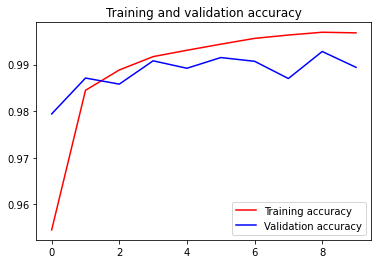

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()